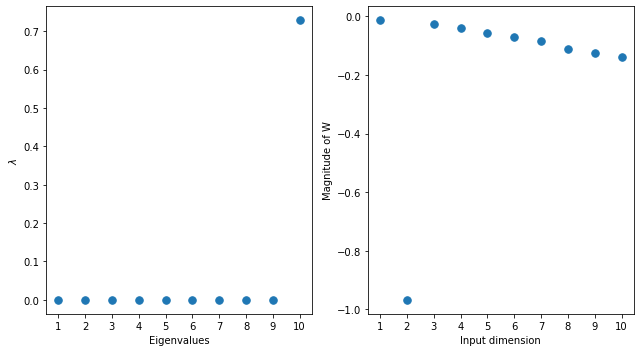

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

"""
Scheidegger & Bilionis (2017), 
Machine Learning for High-Dimensional Dynamic Stochastic Economies

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2927400

The example below corresponds to figure 4 from the paper.
It demonstrates the procedure for constructing 
the active subspace and then compares the Gaussian process 
regression on the original subspace to the GPR on the active subspace.

In this example, we move to a higher dimensional function test_function:ℝ^10→ℝ. 
"""

#Figure 4
#In this example, we move to a higher dimensional function test_example:ℝ^10→ℝ. 

def test_example(x):
    return np.exp(0.01*x[0] + 0.7*x[1] + 0.02*x[2] + 0.03*x[3] + 0.04*x[4] + 
                  0.05*x[5] + 0.06*x[6] + 0.08*x[7] + 0.09*x[8] + 0.1*x[9])

def dtest_example(x):
    val = test_example(x)
    coefs = np.array([0.01, 0.7, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.09, 0.1])
    return val[:, None] * coefs[None, :]


#Evaluating this function on points in \Omega = [-1,1]^2
def randOmega(N, D):
    "random points on \Omega = [-1,1]^D"
    return 2 * (np.random.rand(N, D) - 0.5)

def example():
    np.random.seed(41)
    N = 300
    X = randOmega(N, 10)
    V = test_example(X.T)
    G = dtest_example(X.T)
    CN = (G.T @ G) / N

    # find active subspace
    vals, vecs = linalg.eigh(CN)
    W = vecs[:, -1]
    
    fig, ax = plt.subplots(1, 2, figsize=(9, 5))
    x = np.arange(1, 11)
    ax[0].plot(x, vals, ".", ms=15)
    ax[0].set_xlabel("Eigenvalues")
    ax[0].set_xticks(x)
    ax[0].set_ylabel("$\lambda$")
    
    ax[1].plot(x, W, ".", ms=15)
    ax[1].set_xlabel("Input dimension")
    ax[1].set_xticks(x)
    ax[1].set_ylabel("Magnitude of W")
    
    fig.tight_layout()
    plt.show()

    return fig


example();